In [81]:
# Chem 277B: Machine Learning Algorithms for
#            Molecular Sciences
#
# Date Created: 11/28/2024
# Last revisited: 11/29/2024


##################################
# FILE FOR RUNNING LSTM MODEL
##################################

'''can use lstm class to tune model parameters
and compare model output to actual data. Different metrics/graphs
and visualizations can be called from the utils file'''






'can use lstm class to tune model parameters\nand compare model output to actual data. Different metrics/graphs\nand visualizations can be called from the utils file'

In [82]:
# imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nrsim_lstm import NRSIM_LSTM as lstm
import utils277b as utils

In [83]:
# read data from csv file

filepath="test_file"
data = pd.read_csv(filepath)


data.head(5)

,Time,pH,Hydrogen,Total Gas,Temperature,Pressure,Radioactivity,Power,Reactor Safety,Injection of Air,Injection of Air Degree,Resin Overheat,Resin Overheat Degree,Fuel Element Failure,Fuel Element Failure Degree,Chemical Addition,Vent Gas
0,0,11.000000,50.000000,60,500.000000,2100.000000,10.0,100.0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1,1,10.993204,49.977273,60,499.500000,2099.000000,10.0,100.0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2,2,10.979613,50.202969,60,500.965204,2108.935132,10.0,100.0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,False
3,3,10.959226,49.976253,60,499.500000,2099.000000,10.0,100.0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,False
4,4,10.932043,50.201945,60,500.965204,2108.935132,10.0,100.0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,False


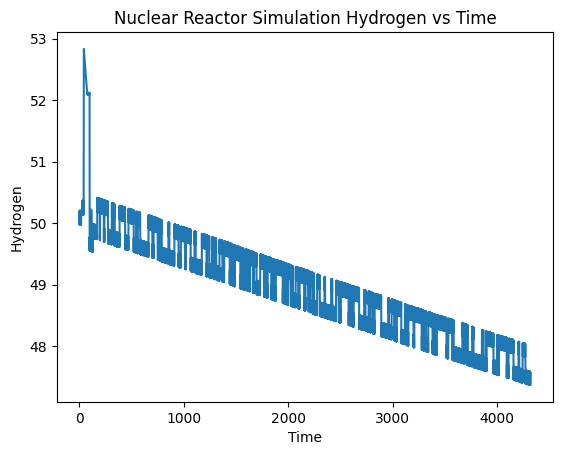

In [84]:
# setting up training data

n_past = 100
m_future = 50
features = 1

target_param = "Hydrogen"

# t represents time steps
t = data["Time"].values
t = t.reshape(len(t), 1)

# y(t) is the value of the target parameter at time t
y_t = data[target_param].values
y_t = y_t.reshape(len(y_t), 1)

scaler, y_t_normalized = utils.scale(y_t)

# creating training and testing data
X, y = utils.prep_lstm_data(y_t_normalized, n_past, m_future)



plt.plot(data["Time"].values, y_t)
plt.xlabel("Time")
plt.ylabel(f"{target_param}")
plt.title(f"Nuclear Reactor Simulation {target_param} vs Time")
plt.show()

In [85]:
# each shape[1] value corresponds to the number of points in the past 
# and number of points in the future for X and y, respectively

print(X.shape, y.shape)

(4172, 100, 1) (4172, 50, 1)


In [86]:
# train test splitting data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [87]:
# model setup 

# stacked lstm layers
neurons = [12, 6]
activation = "tanh"

# temporal params
n_past_timesteps = X.shape[1]
n_features = X.shape[2]
n_predicted_timesteps = y.shape[1]

# optimization + metrics
optimizer = "adam"
loss = "mse"
metrics =["mae", "mse"]

# convolutional layer
conv_layer = False
nfilters = 64  
conv_act = 'relu' 
pool_size = 2  



my_model = lstm(
    neurons,
    activation,
    n_past_timesteps,
    n_features,
    n_predicted_timesteps,
    optimizer,
    loss,
    metrics,
    conv_layer,
    nfilters,
    conv_act,
    pool_size
)

In [88]:
# fitting model on training data

n_epochs = 20
batch_size = 16


my_model.fit(X_train, y_train, nEpochs=n_epochs, nBatches=batch_size, val_split=0.2, verb=2, shuf=False)


Epoch 1/20
157/157 - 3s - 22ms/step - loss: 0.0585 - mae: 0.1717 - mse: 0.0585 - val_loss: 0.0050 - val_mae: 0.0580 - val_mse: 0.0050
Epoch 2/20
157/157 - 2s - 13ms/step - loss: 0.0072 - mae: 0.0613 - mse: 0.0072 - val_loss: 0.0053 - val_mae: 0.0593 - val_mse: 0.0053
Epoch 3/20
157/157 - 2s - 13ms/step - loss: 0.0070 - mae: 0.0612 - mse: 0.0070 - val_loss: 0.0052 - val_mae: 0.0589 - val_mse: 0.0052
Epoch 4/20
157/157 - 2s - 14ms/step - loss: 0.0072 - mae: 0.0621 - mse: 0.0072 - val_loss: 0.0050 - val_mae: 0.0579 - val_mse: 0.0050
Epoch 5/20
157/157 - 2s - 13ms/step - loss: 0.0073 - mae: 0.0628 - mse: 0.0073 - val_loss: 0.0050 - val_mae: 0.0581 - val_mse: 0.0050
Epoch 6/20
157/157 - 2s - 14ms/step - loss: 0.0073 - mae: 0.0631 - mse: 0.0073 - val_loss: 0.0051 - val_mae: 0.0585 - val_mse: 0.0051
Epoch 7/20
157/157 - 2s - 14ms/step - loss: 0.0074 - mae: 0.0633 - mse: 0.0074 - val_loss: 0.0052 - val_mae: 0.0590 - val_mse: 0.0052
Epoch 8/20
157/157 - 2s - 13ms/step - loss: 0.0074 - mae: 0.06

In [89]:
# model history

out = my_model.get_model().history



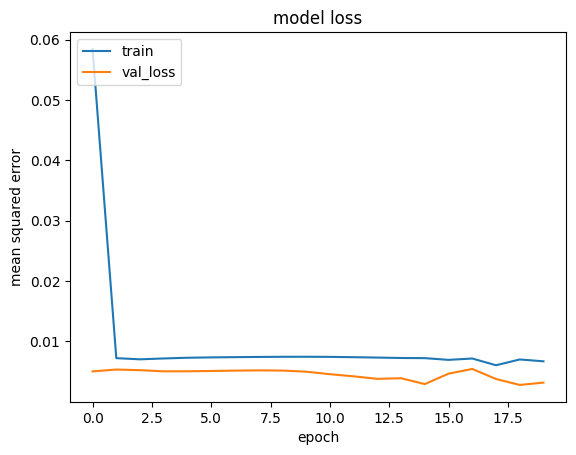

In [90]:
# plotting loss during training
plt.plot(out.history['loss'])
plt.plot(out.history['val_loss'])
plt.title('model loss')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc = 'upper left')
plt.savefig('training loss.pdf')
plt.show()


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


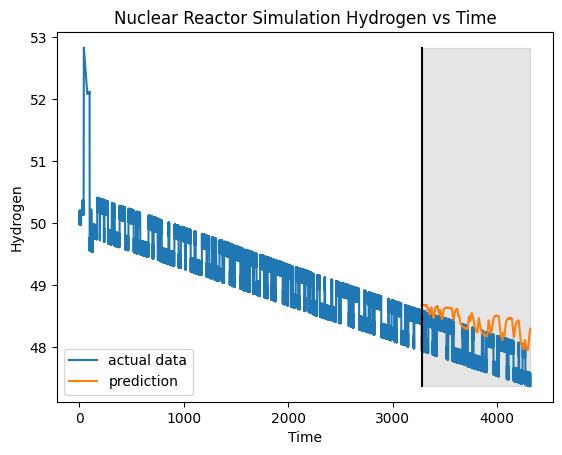

In [91]:
# predicting + transforming normalized data 
y_pred_normalized = my_model.predict(X_test)
back  = y_pred_normalized.shape[0]
y_pred = scaler.inverse_transform(y_pred_normalized)

# setting bounds for graph
y_min = min(np.min(y_pred), np.min(y_t)) 
y_max = max(np.max(y_pred), np.max(y_t))
plt.ylim(y_min - 0.25, y_max + 0.25)

# plot
plt.plot(t, y_t)
plt.plot(t[-back:], y_pred[:, m_future-1])
plt.legend(['actual data', 'prediction'])
plt.fill_between([t[-back,0], t[-1,0]], y_min, y_max , color = 'k', alpha = 0.1)
plt.plot([t[-back,0], t[-back,0]], [y_min, y_max ], 'k-')
plt.xlabel("Time")
plt.ylabel(f"{target_param}")
plt.title(f"Nuclear Reactor Simulation {target_param} vs Time")
plt.show()